<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/DMEWMA_MEWMD_Control_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code demonstrates how to plot DMEWMA and MEWMD control Charts when n=1 using the T2 statistic.

---
Note that this code should work for the Phase I and II of the control charting.
Just make sure mu and sigma are estimated from the Phase I dataset.
Ref. Zhang and Chang (2008) Multivariate EWMA control charts using individual obs for process mean and variance monitoring and diagnosis, IJPR, 46(24), pp 6855-6881
Code Modified by Shing Chang, 4/13/2022

In [2]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [ ]:
# retrive data for Drug Effect data k=3
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/Hotelling_T2.csv', sep=',', na_values=".")
#generate the Phase I data using filter
#use the first 18 observations to setup the control charts
dataI= [data[['Fever', 'Pressure', 'Aches']][data['ID'] == "Placebo"]]

#retrieve the Phase II data
dataII= [data[['Fever', 'Pressure', 'Aches']][data['ID'] == "Drug"]]

#all data points; the data type is a list
dataAll=[data[['Fever', 'Pressure', 'Aches']]]

dataI

[    Fever  Pressure  Aches
 0    40.9        54     14
 1    39.5        75     18
 2    39.4        57     24
 3    38.2        71     24
 4    39.7        65     22
 5    38.9        49     30
 6    38.6        58     25
 7    39.9        52     17
 8    41.3        62     18
 9    38.1        57     20
 10   39.6        78     19
 11   37.1        92     15
 12   39.5        63     13
 13   40.3        52     25
 14   41.5        46     27
 15   39.3        56     14
 16   37.6        86     16
 17   40.6        48     21]

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=18
x1=np.reshape(dataI, (18,3))

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=38
x3=np.reshape(dataAll, (38,3))

In [ ]:
# compute column means since x1 is the Phase I data
mean1=np.mean(x1, axis=0)
mean1

array([39.44444444, 62.27777778, 20.11111111])

In [ ]:
# mean1 shape should not be (3,1)
# mean1.flatten()
# use the above statement if the shape is (3,1)
mean1.shape

(3,)

In [ ]:
# compute the covariance matrix based on Phase I data
matcov1 = np.cov(x1.T)
matcov1

array([[  1.49673203, -10.43071895,   0.64771242],
       [-10.43071895, 175.15359477, -28.5620915 ],
       [  0.64771242, -28.5620915 ,  24.45751634]])

In [ ]:
lam=0.15
Ztminus1=0
Zt= lam * dif + (1-lam) * Ztminus1
Zt

array([ 0.17333333, -2.14166667,  0.13333333])

In [ ]:
 # validating the computational results in the function def fit(self, data, lam, H, mu, sigma):
 Z = []
 DIF=[]
Ztminus1=np.zeros(3)
for sample in x1:
    dif = sample - mean1
    Zt= lam * dif + (1-lam) * Ztminus1
    Z.append(Zt)
    Ztminus1=Zt
    DIF.append(dif)
Z

[array([ 0.21833333, -1.24166667, -0.91666667]),
 array([ 0.19391667,  0.85291667, -1.09583333]),
 array([ 0.1581625, -0.0666875, -0.348125 ]),
 array([-0.05222854,  1.25164896,  0.28742708]),
 array([-0.00606093,  1.47223495,  0.52764635]),
 array([-0.08681845, -0.74026696,  1.93183273]),
 array([-0.20046235, -1.27089358,  2.37539116]),
 array([-0.10205967, -2.62192621,  1.55241582]),
 array([ 0.19158262, -2.27030395,  1.00288678]),
 array([-0.03882144, -2.72142502,  0.83578709]),
 array([-0.00966489,  0.04512206,  0.54375236]),
 array([-0.35988183,  4.49668709, -0.30447716]),
 array([-0.29756622,  3.93051736, -1.32547225]),
 array([-0.12459795,  1.79927309, -0.39331808]),
 array([ 0.20242507, -0.91228454,  0.69901297]),
 array([ 0.15039465, -1.71710853, -0.32250565]),
 array([-0.14883122,  2.09879109, -0.89079647]),
 array([ 0.0468268 , -0.35769424, -0.62384366])]

In [ ]:
# compute the MEWMA T2 values for Phase I data
lam=0.15
matcov =lam/(2-lam) * matcov1
matinv = np.linalg.inv(matcov)  
dif_avgs=np.mean(DIF, axis=0)  
#dif_avgs
for sample in DIF:
    #sample=Z[5]
    temp=matinv.dot(sample.T).dot(sample)
    print(temp)

44.31554101487282
21.301831283403278
8.261528895829509
25.87496509753833
8.328498462588659
62.43063064343714
23.785875278534846
24.25645800762374
47.64649547268004
46.57707391469545
39.28968724370986
67.46018900222288
31.625791356035716
16.452399157102008
55.70862914937648
46.61483551302803
42.63745126097358
16.432119246347852


In [ ]:
dif_avgs.shape

(3,)

In [ ]:
I=np.identity(3)

In [ ]:
I.dot(dif_avgs).dot(dif_avgs.T)

3.272311903139012e-30

In [ ]:
diff @ difT

array([[ 2.49319002e-30, -1.24659501e-30,  6.23297505e-31],
       [-1.24659501e-30,  6.23297505e-31, -3.11648753e-31],
       [ 6.23297505e-31, -3.11648753e-31,  1.55824376e-31]])

In [3]:
class MEWMAcombo:

    def fitDMEWMA(self, data, N, lam, H, mu, sigma):
        # data should contain at least N initial Phase I data and Phase II data 
        # H is the upper control limits & lam is the EWMA coef lambda
        # mu should be known or estimated by the phase I data
        # sigma is the covariance matrix from the Phase I data
        # this algorithm will use sigma for the first N observations
        # then the last N observations will be used to estimate the covariance matrix
        self._title = "DMEWMA Control Chart"
        self._stat = " DMEWMA T2"
        self.data = np.array(data)
        self.numsample = len(data)
        #size is p the number of variates
        self.size=len(np.mean(data, axis=0))
        self.lam=lam
        self.H=H
        self.N=int(N)

       
        Z = []
        S=[]
        DIF=[]
        current=int(0)
        Ztminus1=np.zeros(self.size)
        S_mat= np.zeros(shape=(self.size, self.size))
        # compute the estimated covariance matrix for the last N samples
        # store all MEWMA values in Z and all diff=x[]-mu in DIF
        for sample in data:
            S_temp= np.zeros(shape=(self.size, self.size))
            if current < N: 
                S_mat=sigma
            else:
                start=int(current-self.N +1)
                for i in range(self.N):
                    dif=data[start+i]-mu
                    difT=np.reshape(dif, (1,self.size))
                    diff=np.reshape(dif, (self.size,1))
                    S_temp += diff @ difT
                    #if (start==5): print(S_temp)  
                S_mat=S_temp/(N-1)
                #print(S_mat)

            current+=1
            matcov = lam/(2-lam) * S_mat
            matinv = np.linalg.inv(matcov)  
            S.append(matinv)       
        
            # compute the MEWMA values   
            dif = sample - mu
            Zt= lam * dif + (1-lam) * Ztminus1
            Z.append(Zt)
            Ztminus1=Zt
            DIF.append(dif)

        # compute the T2 statistics using MEWMA samples
        T2values = []
        current=int(0)
        for zi in Z:     
            value = S[current].dot(zi.T).dot(zi)
            T2values.append(value)
            current += 1

        # collect chart statistics and parameters for plotting
        self.T2=T2values
        #dif_avgs=np.mean(DIF, axis=0) 
        self.lcl = 0
        # It is not clear how to set up a center line in multivariate chart
        # self.center = matinv.dot(dif_avgs.T).dot(dif_avgs)
        self.ucl = H

        #return (values, center, lcl, ucl, self._title)

    def fitMEWMD(self, data, m, N, lam, H, mu, sigma):
        # data should contain at least N initial Phase I data and Phase II data 
        # H is the upper control limits & lam is the EWMA coef lambda
        # mu should be known or estimated by the phase I data
        # sigma is the covariance matrix from the Phase I data
        # this algorithm will use sigma for the first N observations
        # then the last N observations will be used to estimate the moving average
        # m is the numer of observations used for Phase I compuation
        self._title = "MEWMD Control Chart"
        self._stat = " MEWMD T2"
        self.data = np.array(data)
        self.numsample = len(data)
        #size is p the number of variates
        self.size=len(np.mean(data, axis=0))
        self.lam=lam
        self.H=H
        self.N=int(N)
       
        M = []
        V = []
        VDIF=[]
        current=int(0)
        S_mat= np.zeros(shape=(self.size, self.size))
        # compute the estimated covariance matrix for the last N samples
        # store all MEWMA values in Z and all diff=x[]-mu in DIF
        for sample in self.data:
            S_temp= np.zeros(shape=(self.size, self.size))
            if current < m: 
                Y = mu # moving average is the Phase I mean during phase I period
            else:
                start=int(current-self.N +1)
                Y=0
                for i in range(self.N):
                    Y += self.data[start+i]
                Y = Y/N #moving average of the last N obs
            V.append(np.abs(sample - Y))
            current += 1

        # compute v-bar    
        v_temp=np.zeros(self. size)
        for vi in V:
            v_temp += vi 
        v_avg=v_temp/m
        print("Average abs(xi - Y(N)) where Y is the moving average=")
        print(v_avg)
        
        # estimate the covariance matrix using m Phase I obs.
        Sv=np.zeros(shape=(self.size, self.size))
        current=int(0)
        for vi in V: 
            dif = vi-v_avg
            VDIF.append(dif)
            if current < m:
                difT=np.reshape(dif, (1,self.size))
                diff=np.reshape(dif, (self.size,1))
                Sv += diff @ difT 
            current += 1 
        # estimate the covariance matrix
        S_mat=Sv/(m-1)
        print("m=", m)
        print("cov estimate =")
        print(S_mat)
        matcov = lam/(2-lam) * S_mat
        matinv = np.linalg.inv(matcov)    
        
        # compute the MEWMA values M
        Mtminus1=np.zeros(self.size)  
        for vi in VDIF: 
            Mt= lam * vi + (1-lam) * Mtminus1
            M.append(Mt)
            Mtminus1=Mt
           
        # compute the T2 statistics using MEWMA samples
        T2values = []
        current=int(0)
        for mi in M:     
            value = matinv.dot(mi.T).dot(mi)
            T2values.append(value)
  
        # collect chart statistics and parameters for plotting
        self.T2=T2values
        #dif_avgs=np.mean(DIF, axis=0) 
        self.lcl = 0
        # It is not clear how to set up a center line in multivariate chart
        # self.center = matinv.dot(dif_avgs.T).dot(dif_avgs)
        self.ucl = H
        return S_mat

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(self.numsample):
            lcl[i] = self.lcl
            ucl[i] = self.ucl
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2,marker="o",color="k",label=self._stat)
        #plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title(self._title)
        plt.legend(loc="upper left")
        plt.show()


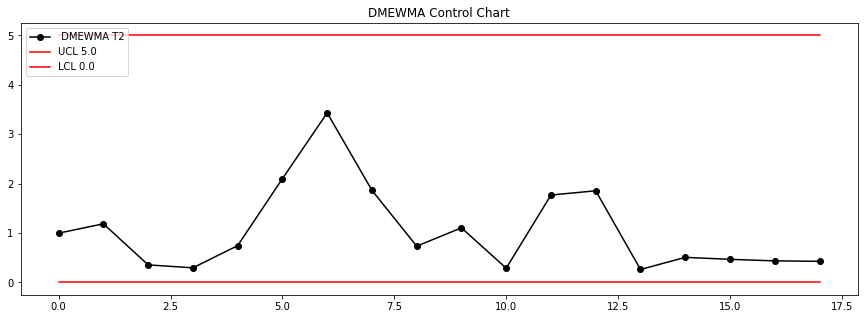

In [ ]:
# This chart is for Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# size is the number of variables
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
chart.fitDMEWMA(data=x1, N=10, lam=0.15, H=5, mu=mean1, sigma=matcov1)
chart.ControlChart()

# **Now we will use the mean and sigma estimated from the Phase I process above and plot all data**

Your turn: how do you control the mean and std so that only the Phase I data is used? Note that the following chart should use the same control limits as the phase I chart.

In [ ]:
# all data is converted into a proper matrix
x3=np.reshape(dataAll, (38,3))

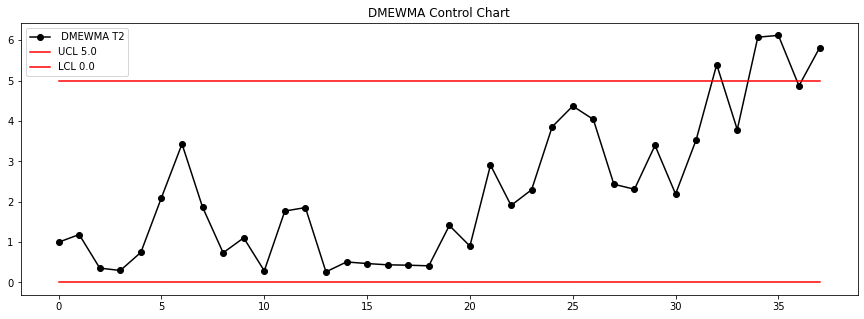

In [ ]:
# This chart is for Phase I or Phase II assuming all mean and sigma are estimated
# In this block, all I data are plotted 
# size is the number of variables
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
# once the observations past the Nth points, the last N obs are used to estimate the sigma matrix
chart.fitDMEWMA(data=x3, N=10, lam=0.15, H=5, mu=mean1, sigma=matcov1)
chart.ControlChart()

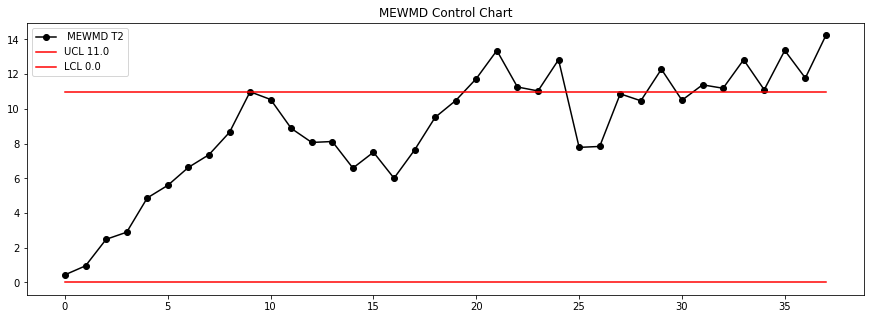

In [ ]:
# This chart is for BOTH Phase I and Phase II assuming all mean and sigma are estimated using Phaae I data
# the number of obs of phase I data should be specified as m
# the last N observations for moving average control chart should be specified
# This MEWMD chart shoud be insensitive to mean changes but reacte to the variance co-variance changes
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
chart.fitMEWMD(data=x3, m=18, N=5, lam=0.15, H=11, mu=mean1, sigma=matcov1)
chart.ControlChart()

Comparing both DMEWMA for detecting mean shifts and MEWMD for detection variance/covariance changes, it seems the differences in placebo and drug lie in the variance changes as the T2 values rise a lot faster in the drug use phase (Phase II).

# Since n=1, a much bigger m is need to use both DMEWMA MEWMD charts properly

---
m obs, n=1 in Phase I and 15 samples for Phase II


In [22]:
# to create multivariate variates given mean vector and covariance matrix
# the Phase I data set is x1 with mean vector mean1 and covariance cov
m=100
mean1 = np.array([5, 15, 20])
mean2 = np.array([6, 16, 20])
cov1 = np.array([[2.0, 0.5, 1.5], [0.5, 4.0,1.0], [1.5,1.0,5.0]])
cov2 = np.array([[5.5, 0.5, 1.5], [0.5, 4.0,1.0], [1.5,1.0,5.0]])
x1 = multivariate_normal.rvs(mean1, cov1, m)
x2 = multivariate_normal.rvs(mean2, cov1, 30)
x3 = multivariate_normal.rvs(mean1, cov2, 30)

In [16]:
# Generate a mean vector shift p=3 time series
# series1 has a mean shift at the 2nd dimension
data_series1=np.vstack((x1,x2))

In [6]:
meanOne=np.mean(x1, axis=0)
covOne=np.cov(x1.T)
meanOne.shape
#covOne.shape

(3,)

In [23]:
data_series2=np.vstack((x1,x3))

# Phase I Charting

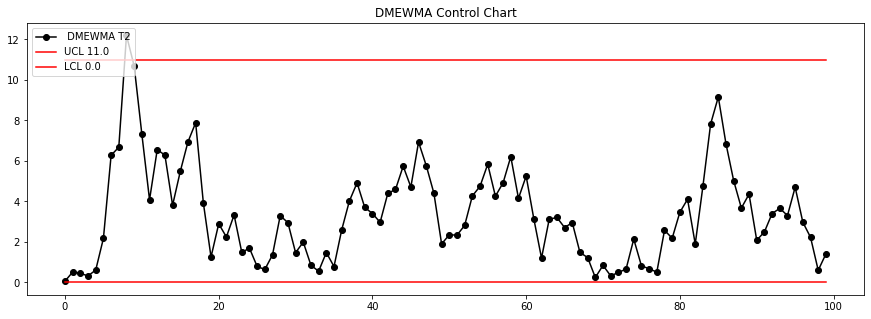

Average abs(xi - Y(N)) where Y is the moving average=
[1.21102568 1.60618136 1.55205415]
m= 100
cov estimate =
[[0.72503034 0.08982436 0.22964123]
 [0.08982436 1.2954036  0.19026249]
 [0.22964123 0.19026249 1.42926965]]


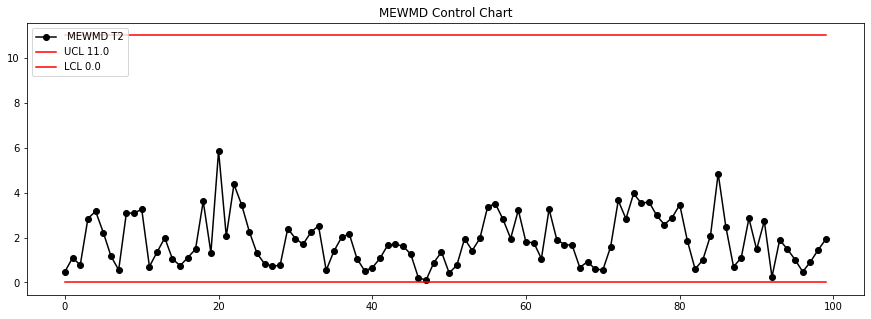

In [27]:
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
# once the observations past the Nth points, the last N obs are used to estimate the sigma matrix
chart.fitDMEWMA(data=x1, N=15, lam=0.15, H=11, mu=mean1, sigma=cov1)
chart.ControlChart()
#
cov=chart.fitMEWMD(data=x1, m=100, N=5, lam=0.15, H=11, mu=mean1, sigma=cov1)
chart.ControlChart()

# Phase II Charting 

---

-- mean vector shift after obs > 100
-- your turn: try different lambda and H combinations

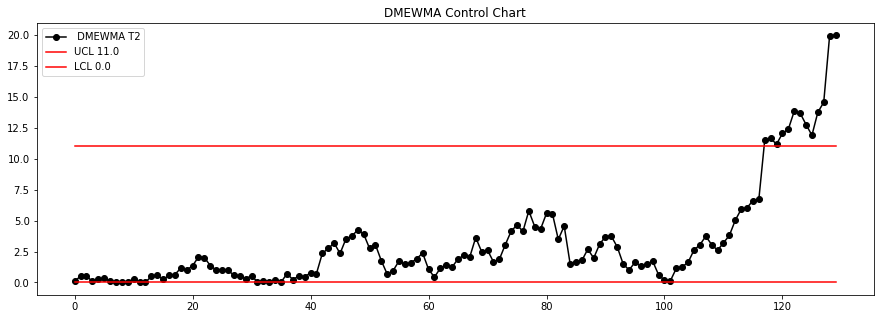

Average abs(xi - Y(N)) where Y is the moving average=
[1.36052178 2.27222734 2.13935614]
m= 100
cov estimate =
[[0.71271151 0.19556852 0.2756536 ]
 [0.19556852 1.76179765 0.2153504 ]
 [0.2756536  0.2153504  1.95560718]]


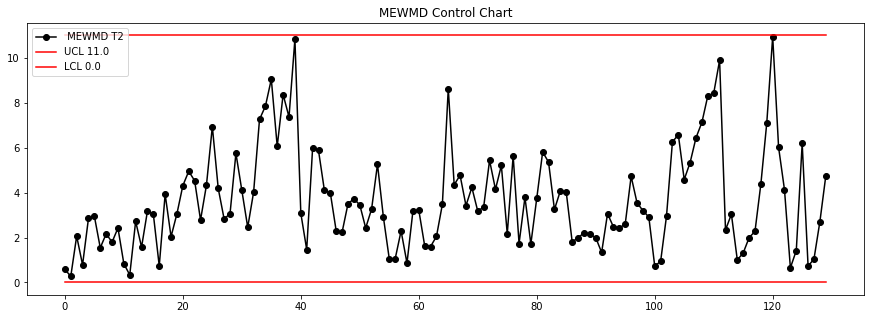

In [32]:
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
# once the observations past the Nth points, the last N obs are used to estimate the sigma matrix
# 
chart.fitDMEWMA(data=data_series1, N=15, lam=0.05, H=11, mu=mean1, sigma=cov1)
chart.ControlChart()
#
# note that sigma is now cov obtained from phase I charting
chart.fitMEWMD(data=data_series1, m=100, N=5, lam=0.35, H=11, mu=mean1, sigma=cov)
chart.ControlChart()

# Phase II Charting

---

-- Variance increases after obs > 100

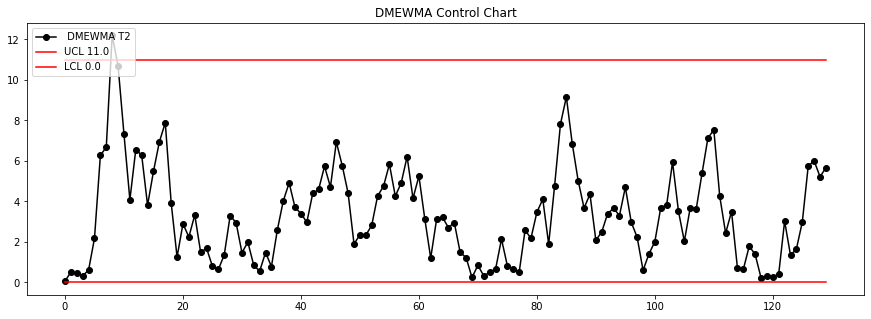

Average abs(xi - Y(N)) where Y is the moving average=
[1.84964204 2.01592402 1.94863206]
m= 100
cov estimate =
[[1.1369807  0.35413584 0.48546057]
 [0.35413584 1.46498849 0.35439875]
 [0.48546057 0.35439875 1.58813232]]


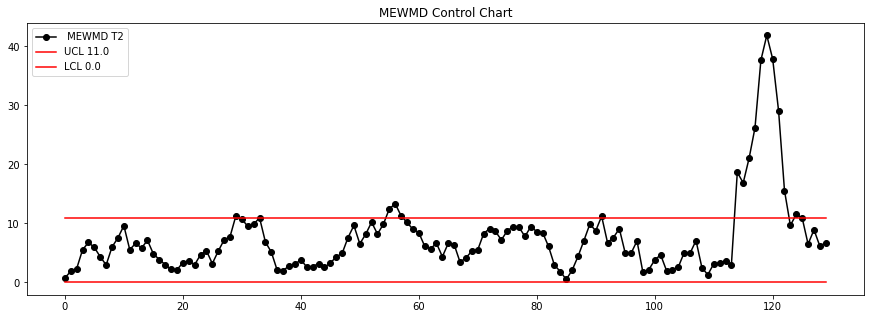

In [29]:
chart = MEWMAcombo()
# chart parameters: lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997; however, H=5 used here
# mean1 and matcov1 is from the Phase I data set x1
# once the observations past the Nth points, the last N obs are used to estimate the sigma matrix
chart.fitDMEWMA(data=data_series2, N=15, lam=0.15, H=11, mu=mean1, sigma=cov1)
chart.ControlChart()
#
chart.fitMEWMD(data=data_series2, m=100, N=5, lam=0.15, H=11, mu=mean1, sigma=cov1)
chart.ControlChart()